In [2]:
import numpy as np

%matplotlib inline

In [3]:
from stingray import Lightcurve

You can create a light curve through array of time stamps and counts

In [6]:
len(lc)

1000

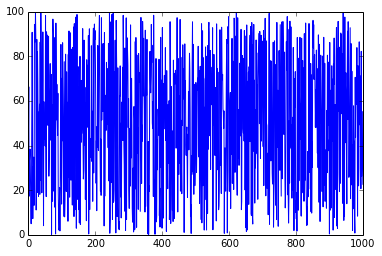

In [21]:
lc.plot()

Alternatively, you can pass on an array of photon arrival times, or otherwise known as event list. Here, we capture the arrival times from a text file.

In [28]:
arrivals = np.loadtxt("Data/photon_arrivals.txt")
# Here, 1 refers to 'dt'
lc_new = Lightcurve.make_lightcurve(arrivals, 1)
arrivals

array([  1.,   1.,   2.,   2.,   2.,   3.,   3.,   3.,   3.,   3.,   4.,
         5.,   5.,   5.,   5.,   6.,   7.,   7.,   7.,   8.,   9.,  10.,
        10.,  10.])

In [29]:
lc_new.counts

array([2, 3, 5, 1, 4, 1, 3, 1, 4])

A variety of operations such including addition, subtraction, truncation, negation, indexing and sorting are available for these Lightcurve objects. For detailed illustration, see: https://github.com/StingraySoftware/notebooks